In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import scipy

In [3]:
def plot_image(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.axis('off')
    plt.show()

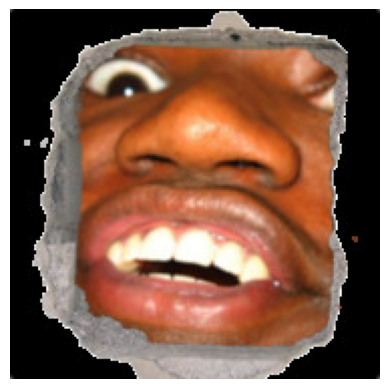

(184, 184, 3)


In [4]:
img = cv.imread('lol.jpg')
plot_image(img)
print(img.shape)

Сначала наложим импульсный шум на изображение

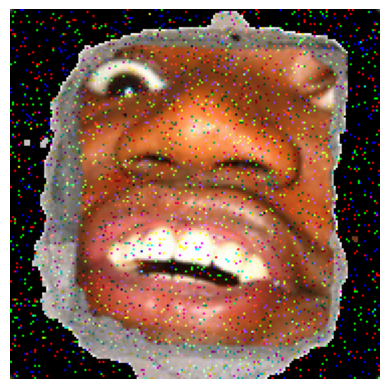

In [5]:
d = 0.05
s_vs_p = 0.5
rng = np.random.default_rng()
vals = rng.random(img.shape)
img_out_pulse = np.copy(img)
if img_out_pulse.dtype == np.uint8:
    img_out_pulse[vals < d*s_vs_p] = 255
else:
    img_out_pulse[vals < d * s_vs_p] = 1.0
img_out_pulse[np.logical_and(vals >= d * s_vs_p, vals < d)] = 0
plot_image(img_out_pulse)

Мультипликативный шум

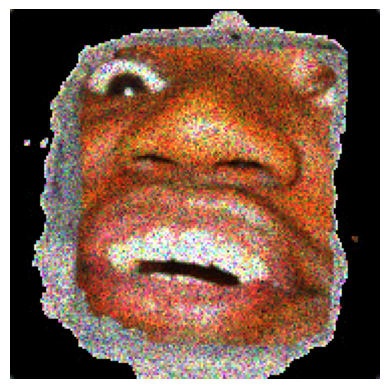

In [6]:
var = 0.1
rng = np.random.default_rng()
gauss = rng.normal(0, var ** 0.5, img.shape)
if img.dtype == np.uint8:
    img_f = img.astype(np.float32)
    img_out_multip = (img_f + img_f * gauss).clip(0,255).astype(np.uint8)
else:
    img_out_multip = img + img * gauss
plot_image(img_out_multip)

Гауссов шум

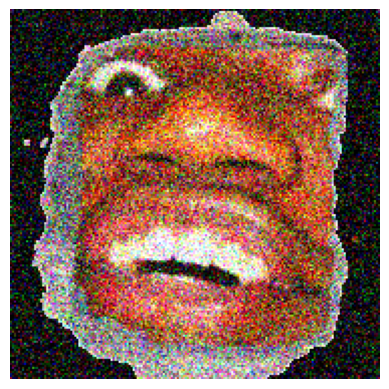

In [7]:
mean = 0
var = 0.05
rng = np.random.default_rng()
gauss = rng.normal(mean, var**0.5, img.shape )
gauss = gauss.reshape(img.shape )

if img.dtype == np.uint8 :
    img_out_gauss = (img.astype(np.float32) + gauss*255).clip(0,255). \
    astype(np.uint8)
else:
    img_out_gauss = (img + gauss).astype(np.float32)
plot_image(img_out_gauss)

Шум квантования

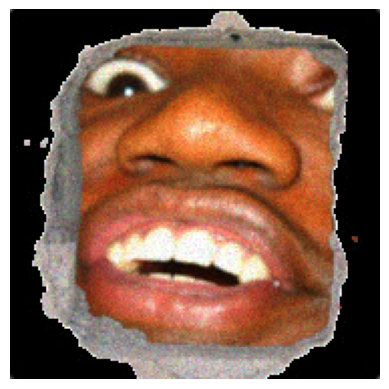

In [8]:
rng = np . random . default_rng ()
if img.dtype == np.uint8:
    I_f = img.astype(np.float32) / 255
    vals = len(np.unique( I_f ))
    vals = 2 ** np . ceil (np.log2(vals))
    img_out_quant = (255 * (rng.poisson(I_f * vals) / float(vals)).clip(0,1)).astype(np.uint8)
else:
    vals = len(np.unique(img))
    vals = 2 ** np.ceil(np.log2(vals))
    img_out_quant = rng.poisson(img * vals )/float(vals)
plot_image(img_out_quant)

Устраним каждый тип шума с помощью фильтра Гаусса

Импульсный шум после/до


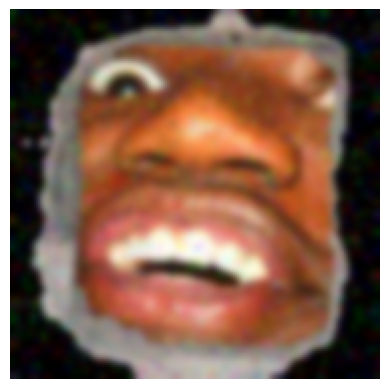

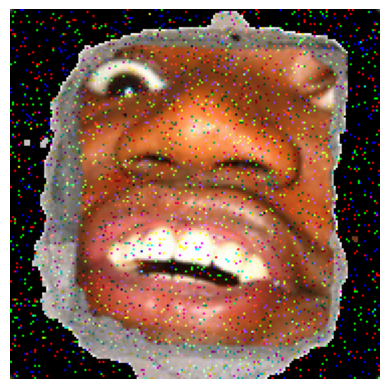

Мультипликативный шум до/после


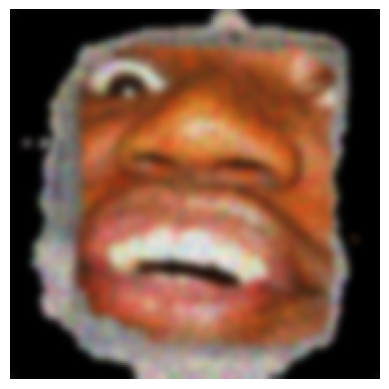

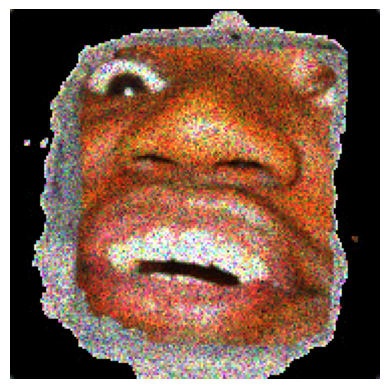

Гаусс шум до/после


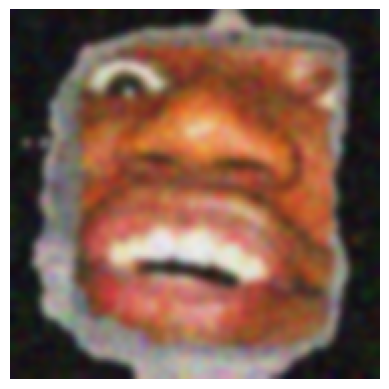

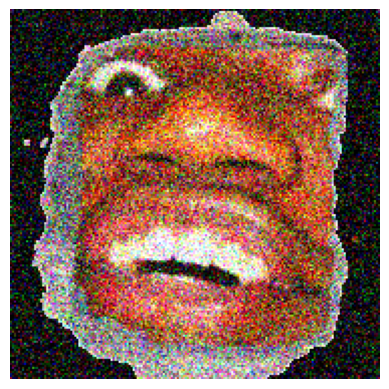

Шум квантования до/после


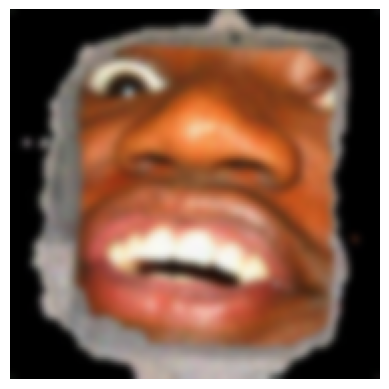

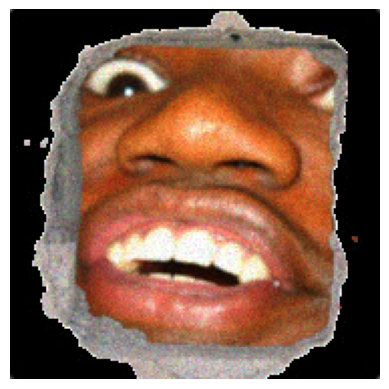

In [9]:
kernel = (11,11)
img_pulse_filtr = cv.GaussianBlur(img_out_pulse,kernel,0)
print('Импульсный шум после/до')
plot_image(img_pulse_filtr)
plot_image(img_out_pulse)

print('Мультипликативный шум до/после')
img_multip_filtr = cv.GaussianBlur(img_out_multip,kernel,0)
plot_image(img_multip_filtr)
plot_image(img_out_multip)

print('Гаусс шум до/после')
img_gauss_filtr = cv.GaussianBlur(img_out_gauss,kernel,0)
plot_image(img_gauss_filtr)
plot_image(img_out_gauss)

print('Шум квантования до/после')
img_quant_filtr = cv.GaussianBlur(img_out_quant,kernel,0)
plot_image(img_quant_filtr)
plot_image(img_out_quant)



Теперь отфильтруем контргармоническим усредняющим фильтром с различными значениями параметра Q

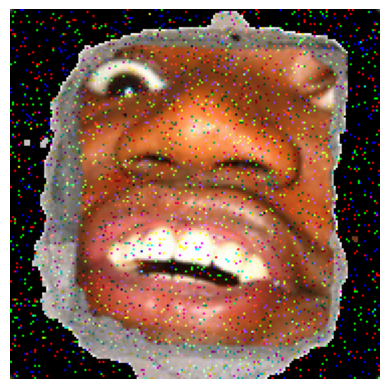

uint8


C:\Users\sbloh\AppData\Local\Temp\ipykernel_30748\2592481215.py:27: RuntimeWarning: divide by zero encountered in power
  I_new_pix_up += (I_copy[x-int((k_size[0]-1)/2)+i,y-int((k_size[1]-1)/2)+j]) ** (Q+1)
C:\Users\sbloh\AppData\Local\Temp\ipykernel_30748\2592481215.py:28: RuntimeWarning: divide by zero encountered in power
  I_new_pix_low += (I_copy[x-int((k_size[0]-1)/2)+i,y-int((k_size[1]-1)/2)+j]) ** Q
C:\Users\sbloh\AppData\Local\Temp\ipykernel_30748\2592481215.py:30: RuntimeWarning: invalid value encountered in divide
  I_new_pix = np.copy(I_new_pix_up/I_new_pix_low)


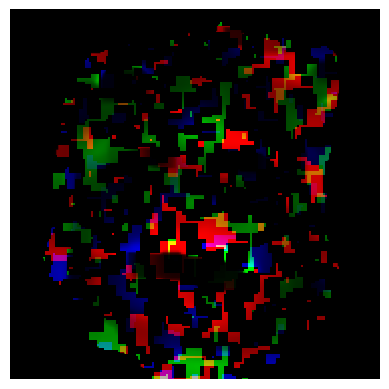

In [28]:
Q = -3
I = np.copy(img_out_pulse)
plot_image(I)
k_size = (8,8)
kernel = np.ones(k_size,dtype = np.float32)
rows, cols = I.shape[0:2]
print(I.dtype)
if I.dtype == np.uint8:
    I_copy = I . astype ( np . float32 ) / 255
    I_new = I . astype ( np . float32 ) / 255
else:
    I_copy = I
    I_new = I
I_copy = cv.copyMakeBorder(I_copy, int (( k_size [0] - 1) / 2) , int ( k_size [0] / 2) , int (( k_size [1] - 1) / 2) ,
                           int ( k_size [1] / 2) , cv . BORDER_REPLICATE )
I_new = cv.copyMakeBorder(I_copy, int (( k_size [0] - 1) / 2) , int ( k_size [0] / 2) , int (( k_size [1] - 1) / 2) ,
                           int ( k_size [1] / 2) , cv . BORDER_REPLICATE )



for x in range(int((k_size[0]-1)/2),int((k_size[0]-1)/2)+184):
    for y in range(int((k_size[1]-1)/2),int((k_size[1]-1)/2)+184):
        I_new_pix_up = 0
        I_new_pix_low = 0
        for i in range(0,k_size[0]):
            for j in range(0,k_size[1]):
                I_new_pix_up += (I_copy[x-int((k_size[0]-1)/2)+i,y-int((k_size[1]-1)/2)+j]) ** (Q+1)
                I_new_pix_low += (I_copy[x-int((k_size[0]-1)/2)+i,y-int((k_size[1]-1)/2)+j]) ** Q
           
        I_new_pix = np.copy(I_new_pix_up/I_new_pix_low)
    
        
        I_new[x,y] = np.copy(I_new_pix)
        
        

plot_image(I_new[int((k_size[0]-1)/2):(184+int((k_size[0]-1)/2)),int((k_size[1]-1)/2):(184+int((k_size[0]-1)/2))])